In [1]:
from simulation import *
from aesthetics import *
from models import *
from data import *
import os as os
import re as re
import pandas as pd

%reload_ext autoreload
%autoreload 2
%matplotlib inline
mpl.rc('text', usetex=True)

# A model for flux prediction
- Reflect at 2*pi and compute JSD with reflection, then add the JSD value for each surface.
- Move by 1 bin and repeat.
- Note the lowest sum (for any bin shift) of JSDs. Call this J_symmetric.

- Compute the PDF on each surface (done)
- Compute the JDF between the PMFs. Call this J_bind.

- p_min: lowest probability means there is a high barrier.

Then: 
f = J_symmetric * J_bind * p_min.

In [2]:
def JSD(x, y): #Jensen-shannon divergence
    x = np.array(x)
    y = np.array(y)
    d1 = x * np.log2(2 * x / (x + y))
    d2 = y * np.log2(2 * y / (x + y))
    d1[np.isnan(d1)] = 0
    d2[np.isnan(d2)] = 0
    d = 0.5 * np.sum(d1 + d2)
    return d


In [3]:
def permute(x, shift):
    return np.roll(x, shift)

In [4]:
def reflect(x, point):
    return np.concatenate((x[point:], x[:point]))[::-1]

In [5]:
df = pd.DataFrame()
for file in range(len(unbound_files)):
    long_name = os.path.splitext(os.path.basename(unbound_files[file]))[0]
    short_name = re.search('^[^_]*', long_name).group(0)
    if short_name == 'chi1CYM185':
        pass
    else:
        data = np.genfromtxt(unbound_files[file])[1:]
        J_symmetric_u = 1.0
        for permutation in range(len(data)):
            J = JSD(data, reflect(data, permutation))
            if J < J_symmetric_u:
                J_symmetric_u = J
                
for file in range(len(unbound_files)):
    long_name = os.path.splitext(os.path.basename(bound_files[file]))[0]
    short_name = re.search('^[^_]*', long_name).group(0)
    if short_name == 'chi1CYM185':
        pass
    else:
        data = np.genfromtxt(bound_files[file])[1:]
        J_symmetric_b = 1.0
        for permutation in range(len(data)):
            J = JSD(data, reflect(data, permutation))
            if J < J_symmetric_b:
                J_symmetric_b = J
        
        df = df.append(pd.DataFrame({'Name': short_name,
                                     'J_symmetric': J_symmetric_u + J_symmetric_b}, index=[0]), ignore_index=True)

In [6]:
tmp = pd.DataFrame()
for file in range(len(unbound_files)):
    long_name = os.path.splitext(os.path.basename(unbound_files[file]))[0]
    short_name = re.search('^[^_]*', long_name).group(0)
    if short_name == 'chi1CYM185':
        pass
    else:
        unbound_data = np.genfromtxt(unbound_files[file])[1:]
        bound_data = np.genfromtxt(bound_files[file])[1:]
        J = JSD(unbound_data, bound_data)
        tmp = tmp.append(pd.DataFrame({'Name': short_name,
                                     'J_bind': J}, index=[0]), ignore_index=True)

In [7]:
tmp.head()

,J_bind,Name
0,0.011806,chi1ARG119
1,0.046672,chi1ARG120
2,0.027365,chi1ARG123
3,0.005905,chi1ARG130
4,0.167753,chi1ARG151


In [8]:
df =df.merge(tmp, on='Name')

In [9]:
tmp = pd.DataFrame()
for file in range(len(unbound_files)):
    long_name = os.path.splitext(os.path.basename(unbound_files[file]))[0]
    short_name = re.search('^[^_]*', long_name).group(0)
    if short_name == 'chi1CYM185':
        pass
    else:
        unbound_data = np.genfromtxt(unbound_files[file])[1:]
        bound_data = np.genfromtxt(bound_files[file])[1:]
        p_min = min(np.concatenate((unbound_data, bound_data)))
        tmp = tmp.append(pd.DataFrame({'Name': short_name,
                                     'p_min': p_min}, index=[0]), ignore_index=True)

In [10]:
df = df.merge(tmp, on='Name')

In [11]:
df

,J_symmetric,Name,J_bind,p_min
0,0.210479,chi1ARG119,0.011806,0.0
1,0.151251,chi1ARG120,0.046672,0.0
2,0.183428,chi1ARG123,0.027365,0.0
3,0.110085,chi1ARG130,0.005905,0.0
4,0.160413,chi1ARG151,0.167753,0.0
5,0.149486,chi1ARG176,0.022304,0.0
6,0.262404,chi1ARG180,0.043847,0.0
7,0.149894,chi1ARG242,0.012198,0.0
8,0.133110,chi1ARG256,0.018063,0.0
9,0.092085,chi1ARG266,0.088928,0.0


In [12]:
df['Mike'] = df['J_bind'] * df['J_symmetric'] * df['p_min']

In [13]:
df.sort_values('Mike', ascending=False)

,J_symmetric,Name,J_bind,p_min,Mike
390,0.128456,chi2HIS73,0.030752,0.002373,9.373511e-06
1127,0.100085,psiGLY330,0.066656,0.000760,5.071537e-06
324,0.115378,chi2ASN85,0.077030,0.000398,3.539087e-06
384,0.251862,chi2HIS128,0.020248,0.000145,7.384380e-07
614,0.186460,chi3MET104,0.076319,0.000036,5.151472e-07
319,0.092254,chi2ASN279,0.051165,0.000109,5.126113e-07
318,0.148804,chi2ASN275,0.045090,0.000063,4.226818e-07
317,0.150427,chi2ASN272,0.037542,0.000072,4.088748e-07
989,0.074431,phiVAL1,0.015583,0.000252,2.922603e-07
617,0.087163,chi3MET217,0.023699,0.000105,2.168823e-07


In [14]:
import pickle

In [15]:
with open('Flux-results.pickle', 'rb') as pickle_file:
    flux = pickle.load(pickle_file)

In [16]:
df['File'] = df['Name']
correlation = pd.DataFrame()
correlation = df.merge(flux, on='File')

In [17]:
correlation

,J_symmetric,Name,J_bind,p_min,Mike,File,Flux with catalysis,Flux with catalysis SEM,Flux without catalysis,Flux without catalysis SEM,Ratio
0,0.210479,chi1ARG119,0.011806,0.0,0.0,chi1ARG119,-0.085266,0.006718,-0.058314,0.007144,1.462175
1,0.151251,chi1ARG120,0.046672,0.0,0.0,chi1ARG120,0.065552,0.011386,-0.028742,0.006518,-2.280685
2,0.183428,chi1ARG123,0.027365,0.0,0.0,chi1ARG123,-0.232762,0.006610,-0.102740,0.015365,2.265536
3,0.110085,chi1ARG130,0.005905,0.0,0.0,chi1ARG130,-0.132464,0.007214,-0.007966,0.004643,16.628032
4,0.160413,chi1ARG151,0.167753,0.0,0.0,chi1ARG151,24.574252,0.045719,0.709663,0.070110,34.628067
5,0.149486,chi1ARG176,0.022304,0.0,0.0,chi1ARG176,0.588888,0.028794,-0.287256,0.036240,-2.050045
6,0.262404,chi1ARG180,0.043847,0.0,0.0,chi1ARG180,4.535876,0.003133,0.074282,0.015266,61.062674
7,0.149894,chi1ARG242,0.012198,0.0,0.0,chi1ARG242,-1.129960,0.003964,0.008774,0.004333,-128.790971
8,0.133110,chi1ARG256,0.018063,0.0,0.0,chi1ARG256,0.014111,0.003337,-0.020649,0.002595,-0.683373
9,0.092085,chi1ARG266,0.088928,0.0,0.0,chi1ARG266,0.012791,0.002237,-0.032071,0.006434,-0.398839


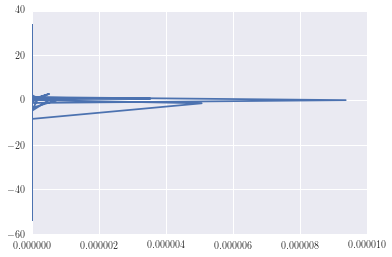

In [18]:
plt.plot(correlation['Mike'], correlation['Flux with catalysis'])

In [19]:
correlation[correlation['p_min'] > 0]

,J_symmetric,Name,J_bind,p_min,Mike,File,Flux with catalysis,Flux with catalysis SEM,Flux without catalysis,Flux without catalysis SEM,Ratio
314,0.133047,chi2ASN22,0.006892,0.000105,9.627329e-08,chi2ASN22,-0.021266,0.001649,0.000560,0.003701,-37.987043
316,0.078563,chi2ASN269,0.108671,0.000021,1.792766e-07,chi2ASN269,0.741779,0.002441,0.047384,0.008384,15.654646
317,0.150427,chi2ASN272,0.037542,0.000072,4.088748e-07,chi2ASN272,0.205536,0.002395,0.001263,0.001357,162.714779
318,0.148804,chi2ASN275,0.045090,0.000063,4.226818e-07,chi2ASN275,0.327886,0.002734,0.011890,0.002325,27.576545
319,0.092254,chi2ASN279,0.051165,0.000109,5.126113e-07,chi2ASN279,-0.002048,0.001356,-0.011157,0.001448,0.183540
321,0.108678,chi2ASN326,0.008336,0.000181,1.639780e-07,chi2ASN326,0.114071,0.002283,-0.006608,0.003371,-17.262420
322,0.081321,chi2ASN53,0.003513,0.000315,8.998390e-08,chi2ASN53,0.010918,0.001143,0.009840,0.002198,1.109488
324,0.115378,chi2ASN85,0.077030,0.000398,3.539087e-06,chi2ASN85,0.614172,0.003477,0.002654,0.002712,231.428144
384,0.251862,chi2HIS128,0.020248,0.000145,7.384380e-07,chi2HIS128,-0.104652,0.003188,0.010422,0.002363,-10.041759
388,0.107208,chi2HIS48,0.016017,0.000021,3.605747e-08,chi2HIS48,-0.031817,0.001821,-0.018895,0.003995,1.683892


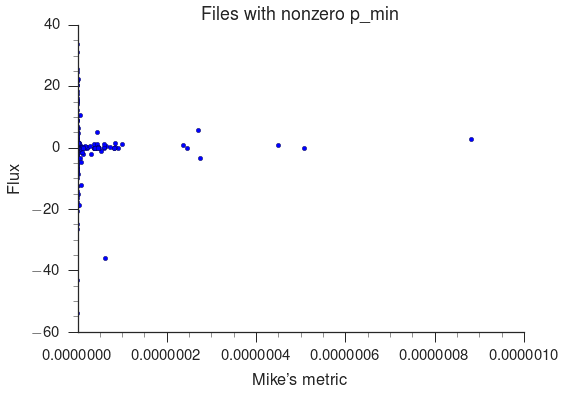

In [42]:
fig = plt.figure()
ax = fig.add_subplot(111)
# ax.scatter(correlation[correlation['p_min'] > 0]['Mike'], correlation[correlation['p_min'] > 0]['Flux with catalysis'])
ax.scatter(correlation['Mike'], correlation['Flux with catalysis'])
ax.set_xlabel('Mike\'s metric')
ax.set_ylabel('Flux')
ax.set_title('Files with nonzero p\_min')
ax.set_xlim([0.000000001, 0.000001])
fetching_plot(fig)

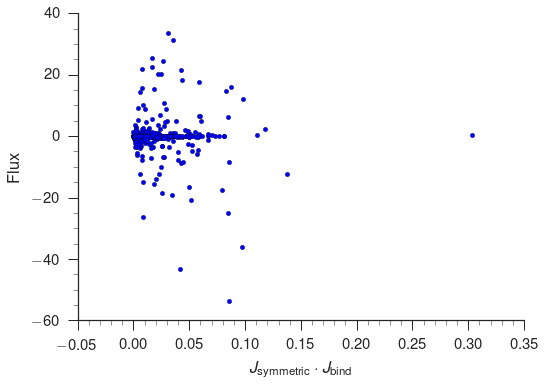

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(correlation['J_symmetric'] * correlation['J_bind'], correlation['Flux with catalysis'])
ax.set_xlabel(r'$J_\text{symmetric} \cdot J_\text{bind}$')
ax.set_ylabel('Flux')
fetching_plot(fig)

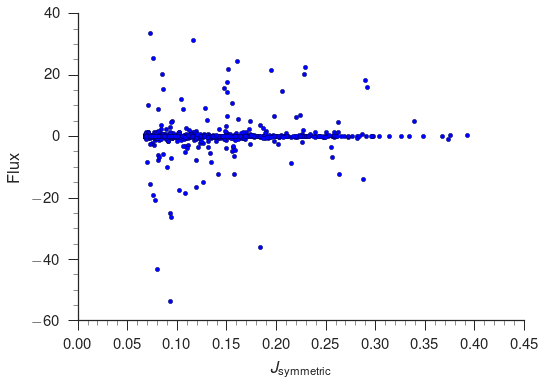

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(correlation['J_symmetric'], correlation['Flux with catalysis'])
ax.set_xlabel(r'$J_\text{symmetric}$')
ax.set_ylabel('Flux')
fetching_plot(fig)

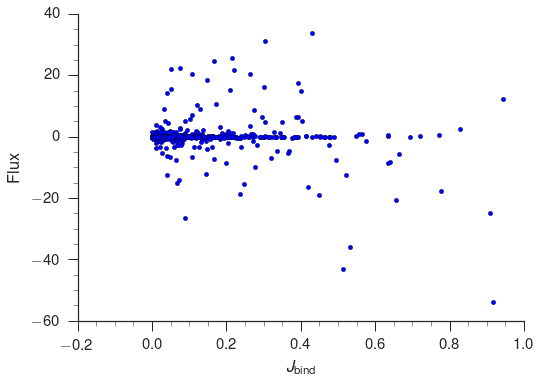

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(correlation['J_bind'], correlation['Flux with catalysis'])
ax.set_xlabel(r'$J_\text{bind}$')
ax.set_ylabel('Flux')
ax.set_xlim
fetching_plot(fig)

In [25]:
correlation.sort_values('Flux with catalysis', ascending=False)[0:20]

,J_symmetric,Name,J_bind,p_min,Mike,File,Flux with catalysis,Flux with catalysis SEM,Flux without catalysis,Flux without catalysis SEM,Ratio
1281,0.072855,psiSER311,0.429173,0.0,0.0,psiSER311,33.652281,0.004932,-0.051298,0.008780,-656.017735
194,0.116533,chi1PHE173,0.302436,0.0,0.0,chi1PHE173,31.200045,0.014472,-0.078738,0.012200,-396.249657
32,0.075529,chi1ASP152,0.215674,0.0,0.0,chi1ASP152,25.618597,0.002859,-0.020989,0.007605,-1220.552886
4,0.160413,chi1ARG151,0.167753,0.0,0.0,chi1ARG151,24.574252,0.045719,0.709663,0.070110,34.628067
83,0.229664,chi1GLU3,0.074232,0.0,0.0,chi1GLU3,22.402664,0.009573,0.025930,0.004183,863.983257
392,0.151836,chi2ILE136,0.051351,0.0,0.0,chi2ILE136,22.000327,0.113141,-1.183333,0.132258,-18.591826
357,0.195146,chi2GLN70,0.219620,0.0,0.0,chi2GLN70,21.601027,0.002754,0.016187,0.007527,1334.480608
43,0.084544,chi1ASP309,0.262769,0.0,0.0,chi1ASP309,20.386404,0.006846,-0.062922,0.002633,-323.996746
207,0.228018,chi1PHE40,0.106948,0.0,0.0,chi1PHE40,20.363098,0.049409,0.107012,0.099053,190.287206
100,0.289576,chi1ILE166,0.148744,0.0,0.0,chi1ILE166,18.442161,0.053690,0.087870,0.021395,209.879491


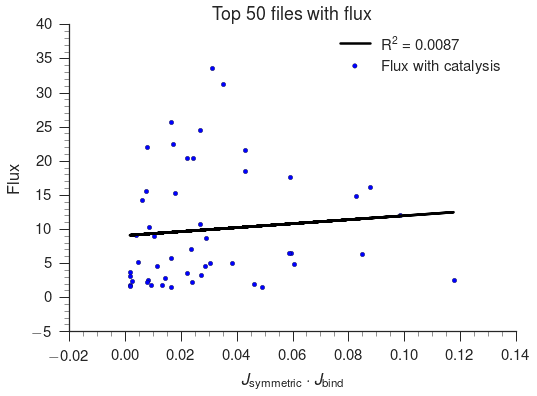

In [26]:
x = correlation.sort_values('Flux with catalysis', ascending=False)[0:50]['J_bind'] * correlation.sort_values('Flux with catalysis', ascending=False)[0:50]['J_symmetric']
y = correlation.sort_values('Flux with catalysis', ascending=False)[0:50]['Flux with catalysis']

slope, intercept, r, pval, stderr = sc.stats.linregress(x, y)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x, y)
ax.plot([i for i in x], [slope * i + intercept for i in x], label=r'R$^{{2}}$ = {0:0.4f}'.format(r**2), c='k')
ax.set_xlabel(r'$J_\text{symmetric} \cdot J_\text{bind}$')
ax.set_ylabel('Flux')
ax.set_title('Top 50 files with flux')
ax.legend()
fetching_plot(fig)

# Instead of using `p_min` from the data, used the smoothed `p_min` after processing. Also, plot abs(flux) instead of flux.

In [27]:
from scipy.ndimage.filters import gaussian_filter
def smooth(x):
    histogram_smooth = gaussian_filter(x, 1)
    histogram_copy = np.copy(x)
    for i in range(len(x)):
        if histogram_smooth[i] != 0:
            histogram_copy[i] = histogram_smooth[i]
        else:
            histogram_copy[i] = min(histogram_smooth[np.nonzero(histogram_smooth)])
    histogram_smooth = histogram_copy
    assert (not np.any(histogram_smooth == 0))
    histogram_smooth /= np.sum(histogram_smooth)
    return histogram_smooth

In [28]:
df = pd.DataFrame()
for file in range(len(unbound_files)):
    long_name = os.path.splitext(os.path.basename(unbound_files[file]))[0]
    short_name = re.search('^[^_]*', long_name).group(0)
    if short_name == 'chi1CYM185':
        pass
    else:
        data = np.genfromtxt(unbound_files[file])[1:]
        data = smooth(data)
        J_symmetric = 1.0
        for permutation in range(len(data)):
            J = JSD(data, reflect(data, permutation))
            if J < J_symmetric:
                J_symmetric = J
        df = df.append(pd.DataFrame({'File': short_name,
                                     'J_symmetric': J_symmetric}, index=[0]), ignore_index=True)
        
tmp = pd.DataFrame()
for file in range(len(unbound_files)):
    long_name = os.path.splitext(os.path.basename(unbound_files[file]))[0]
    short_name = re.search('^[^_]*', long_name).group(0)
    if short_name == 'chi1CYM185':
        pass
    else:
        unbound_data = np.genfromtxt(unbound_files[file])[1:]
        unbound_data = smooth(unbound_data)
        bound_data = np.genfromtxt(bound_files[file])[1:]
        bound_data = smooth(bound_data)
        J = JSD(unbound_data, bound_data)
        tmp = tmp.append(pd.DataFrame({'File': short_name,
                                     'J_bind': J}, index=[0]), ignore_index=True)
        
df = df.merge(tmp, on='File')

tmp = pd.DataFrame()
for file in range(len(unbound_files)):
    long_name = os.path.splitext(os.path.basename(unbound_files[file]))[0]
    short_name = re.search('^[^_]*', long_name).group(0)
    if short_name == 'chi1CYM185':
        pass
    else:
        unbound_data = np.genfromtxt(unbound_files[file])[1:]
        unbound_data = smooth(unbound_data)
        bound_data = np.genfromtxt(bound_files[file])[1:]
        bound_data = smooth(bound_data)
        p_min = min(np.concatenate((unbound_data, bound_data)))
        tmp = tmp.append(pd.DataFrame({'File': short_name,
                                     'p_min': p_min}, index=[0]), ignore_index=True)
df = df.merge(tmp, on='File')
df['Mike'] = df['J_bind'] * df['J_symmetric'] * df['p_min']

In [29]:
df.head()

,File,J_symmetric,J_bind,p_min,Mike
0,chi1ARG119,0.116832,0.008482,4.844723e-09,4.801225e-12
1,chi1ARG120,0.187298,0.043167,2.810269e-09,2.272106e-11
2,chi1ARG123,0.034315,0.026428,8.430807e-09,7.645712e-12
3,chi1ARG130,0.041526,0.004374,2.810269e-09,5.104912e-13
4,chi1ARG151,0.016208,0.149895,2.810269e-09,6.827568e-12


In [30]:
df.sort_values(by='J_bind', ascending=False)

,File,J_symmetric,J_bind,p_min,Mike
312,chi2ASN157,0.077847,0.937970,2.810269e-09,2.052014e-10
367,chi2GLU194,0.053286,0.911281,5.620537e-09,2.729259e-10
72,chi1GLU194,0.034087,0.904599,9.689445e-09,2.987719e-10
1043,psiASN269,0.077716,0.823322,2.810269e-09,1.798169e-10
520,chi2TYR190,0.017550,0.759579,4.844722e-09,6.458156e-11
565,chi3GLU194,0.031694,0.746999,2.810269e-09,6.653406e-11
777,phiGLY112,0.146879,0.707685,2.810269e-09,2.921111e-10
787,phiGLY268,0.079941,0.672150,2.810269e-09,1.510018e-10
1004,psiALA110,0.122513,0.656157,2.810269e-09,2.259120e-10
1321,psiVAL109,0.162503,0.638791,5.620537e-09,5.834430e-10


In [31]:
df.sort_values('Mike', ascending=False)

,File,J_symmetric,J_bind,p_min,Mike
1127,psiGLY330,0.061943,0.062485,9.407035e-04,3.641028e-06
324,chi2ASN85,0.090474,0.074804,5.004911e-04,3.387230e-06
390,chi2HIS73,0.045304,0.026712,2.760765e-03,3.340990e-06
319,chi2ASN279,0.137939,0.046058,1.982689e-04,1.259626e-06
614,chi3MET104,0.142791,0.074892,8.236692e-05,8.808305e-07
384,chi2HIS128,0.124145,0.017789,2.296864e-04,5.072474e-07
1210,psiLYS305,0.075261,0.539513,1.105421e-05,4.488468e-07
383,chi2HIS117,0.070430,0.116278,3.363426e-05,2.754486e-07
538,chi3ARG294,0.053816,0.096377,5.214123e-05,2.704371e-07
329,chi2ASP161,0.226196,0.338912,3.206249e-06,2.457929e-07


In [32]:
# df['File'] = df['Name']
correlation = pd.DataFrame()
correlation = df.merge(flux, on='File')

In [33]:
correlation.head()

,File,J_symmetric,J_bind,p_min,Mike,Flux with catalysis,Flux with catalysis SEM,Flux without catalysis,Flux without catalysis SEM,Ratio
0,chi1ARG119,0.116832,0.008482,4.844723e-09,4.801225e-12,-0.085266,0.006718,-0.058314,0.007144,1.462175
1,chi1ARG120,0.187298,0.043167,2.810269e-09,2.272106e-11,0.065552,0.011386,-0.028742,0.006518,-2.280685
2,chi1ARG123,0.034315,0.026428,8.430807e-09,7.645712e-12,-0.232762,0.006610,-0.102740,0.015365,2.265536
3,chi1ARG130,0.041526,0.004374,2.810269e-09,5.104912e-13,-0.132464,0.007214,-0.007966,0.004643,16.628032
4,chi1ARG151,0.016208,0.149895,2.810269e-09,6.827568e-12,24.574252,0.045719,0.709663,0.070110,34.628067


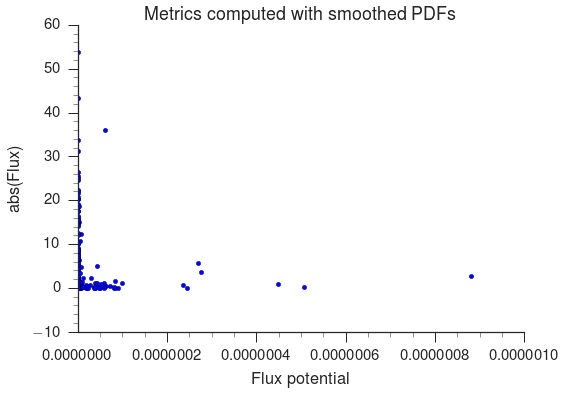

In [34]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(correlation['Mike'], abs(correlation['Flux with catalysis']))
ax.set_xlabel('Flux potential')
ax.set_ylabel('abs(Flux)')
ax.set_title('Metrics computed with smoothed PDFs')
ax.set_xlim([0.000000001, 0.000001])
# ax.set_xscale('log')
fetching_plot(fig)

In [35]:
bars = []
count = []
mean = []
bins = np.linspace(min(correlation['Mike']), max(correlation['Mike']), 10)
for i in range(len(bins)-1):
#     print('Between {} and {}'.format(bins[i], bins[i+1]))
#     print(len(correlation[(correlation['Mike'] > bins[i]) & 
#                              (correlation['Mike'] < bins[i+1])]))
    bars.append(bins[i])
#     count.append(len(correlation[(correlation['Mike'] > bins[i]) & 
#                               (correlation['Mike'] < bins[i+1])]))
    mean.append(np.mean(abs(correlation[(correlation['Mike'] > bins[i]) & 
                             (correlation['Mike'] < bins[i+1])]['Flux with catalysis'])))

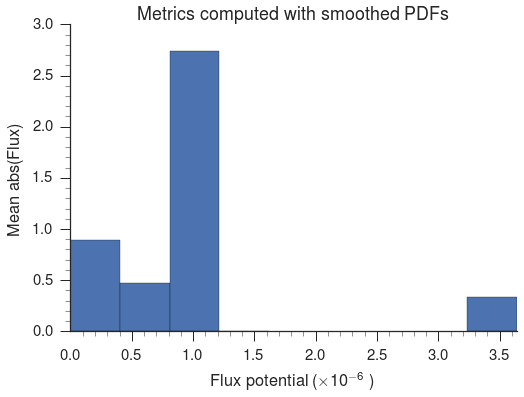

In [36]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.bar(bars, mean, width=bars[1] - bars[0])
ax.set_xlabel('Flux potential')
ax.set_ylabel('Mean abs(Flux)')
ax.set_title('Metrics computed with smoothed PDFs')
ax.set_xlim([bins[0], bins[-1]])
# ax.set_xscale('log')
fetching_plot(fig)
ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax.set_xlim([bins[0], bins[-1]])

fetching_plot(fig)



In [37]:
bars[1] - bars[0]

4.0455863858849525e-07

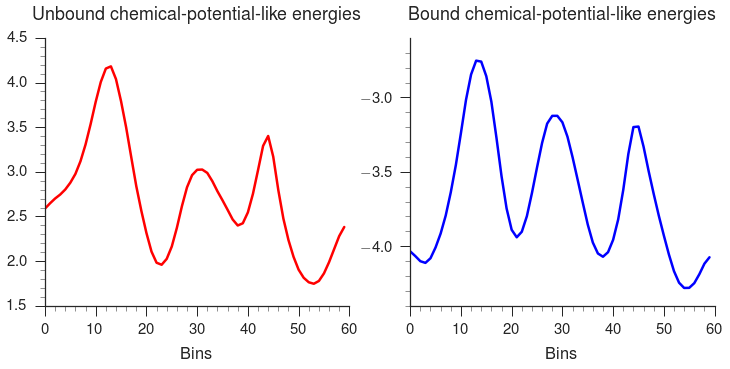

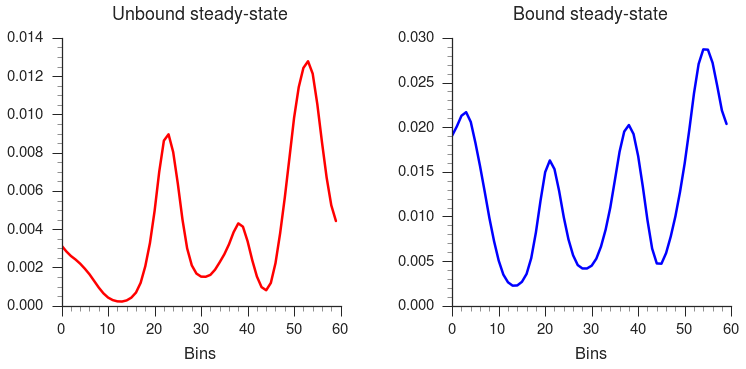

Eigenvector method: C_intrasurface = 4.75e+12, C_intersurface = 240000.0, catalytic rate = 140, cATP = 0.002, dt = 1e-14


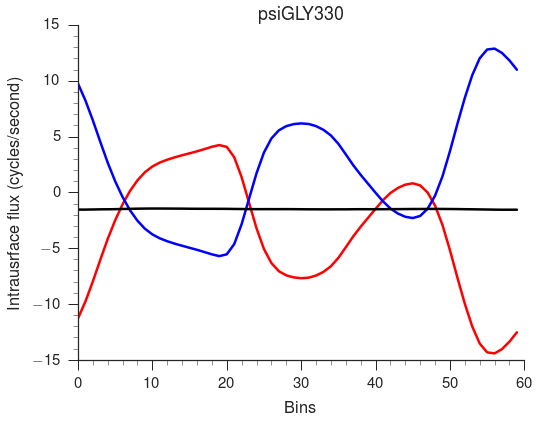

In [38]:
from simulation import *
this = simulation()
this.name = 'psiGLY330'
this.simulate(plot=True)

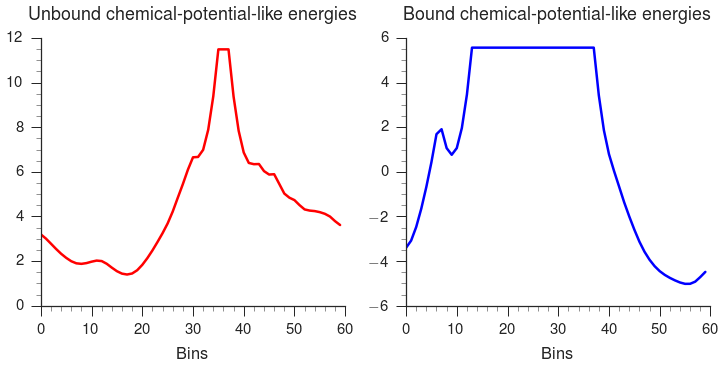

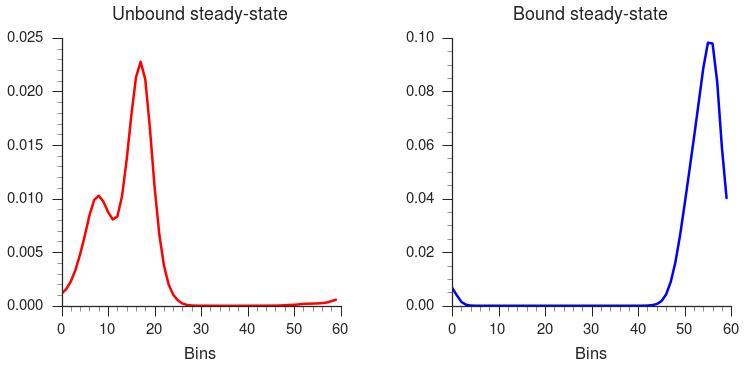

Eigenvector method: C_intrasurface = 4.75e+12, C_intersurface = 240000.0, catalytic rate = 140, cATP = 0.002, dt = 1e-14


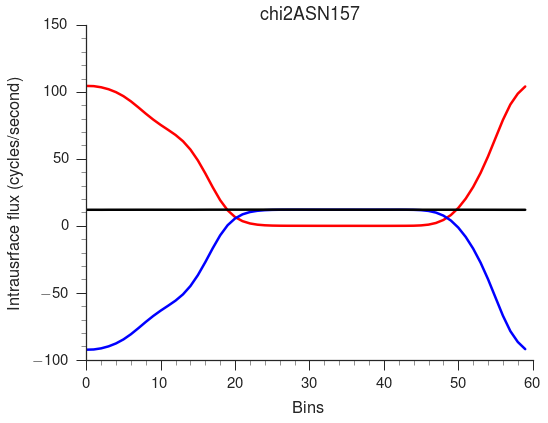

In [39]:
this = simulation()
this.name = 'chi2ASN157'
this.simulate(plot=True)


In [40]:
df.sort_values(by='J_bind', ascending=False).head()

,File,J_symmetric,J_bind,p_min,Mike
312,chi2ASN157,0.077847,0.937970,2.810269e-09,2.052014e-10
367,chi2GLU194,0.053286,0.911281,5.620537e-09,2.729259e-10
72,chi1GLU194,0.034087,0.904599,9.689445e-09,2.987719e-10
1043,psiASN269,0.077716,0.823322,2.810269e-09,1.798169e-10
520,chi2TYR190,0.017550,0.759579,4.844722e-09,6.458156e-11


In [41]:
df.sort_values(by='J_symmetric', ascending=False).head()

,File,J_symmetric,J_bind,p_min,Mike
820,phiILE325,0.295432,0.145352,2.810269e-09,1.206779e-10
340,chi2ASP30,0.280004,0.017242,4.509953e-06,2.177298e-08
524,chi2TYR233,0.267521,0.030007,5.023321e-06,4.032472e-08
185,chi1MET217,0.263835,0.023426,2.810269e-09,1.736921e-11
335,chi2ASP262,0.231744,0.004317,1.467875e-05,1.468447e-08
